<a href="https://colab.research.google.com/github/padmashri23/Prediction_App_Serverless-AWS-ECR-Docker/blob/main/Integrate_Serverless_With_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Create ML Model and Integrate with Serverless Endpoint

!wget https://www.kaggle.com/datasets/ritesaluja/bank-note-authentication-uci-data?select=BankNote_Authentication.csv

--2024-08-29 11:27:26--  https://www.kaggle.com/datasets/ritesaluja/bank-note-authentication-uci-data?select=BankNote_Authentication.csv
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘bank-note-authentication-uci-data?select=BankNote_Authentication.csv.2’

bank-note-authentic     [ <=>                ]   9.12K  --.-KB/s    in 0.01s   

2024-08-29 11:27:27 (819 KB/s) - ‘bank-note-authentication-uci-data?select=BankNote_Authentication.csv.2’ saved [9344]



In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('BankNote_Authentication.csv')

In [ ]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
len(df)

1372

In [ ]:
#Class = 0
len(df[df["class"]==0])

762

In [ ]:
#Class = 1
len(df[df["class"]==1])

610

In [ ]:
# plot
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline
import seaborn as sns

<Axes: xlabel='class', ylabel='count'>

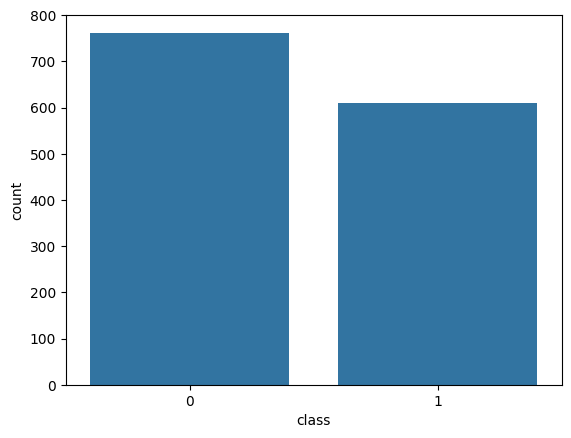

In [ ]:
sns.countplot(x='class',data=df)

In [ ]:
## Train and Test Split
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [ ]:
y.head()

,class
0,0
1,0
2,0
3,0
4,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y, train_size=0.7,random_state=42)

In [ ]:
len(X_train)

960

In [ ]:
1372 * 0.7

960.4

In [ ]:
len(X_test)

412

In [ ]:
#classification problem  as we are classifying whether the note is authentic or not.
#using RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
#Predictions
y_pred = rfc_model.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,

In [ ]:
#Determine Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)

In [ ]:
print(score)

0.9951456310679612


In [ ]:
#showing 99.5% accuracy

In [ ]:
input = [3.62160,8.6661, -2.8073, -0.44699]
pred1 = rfc_model.predict([input])
print(pred1)

[0]


In [ ]:
#save model in a file (serialized)
import pickle
pickle_output = open('bank_note_model.pkl','wb')
pickle.dump(rfc_model,pickle_output)
pickle_output.close()

In [ ]:
#predict on the loaded model
pickle_in = open('bank_note_model.pkl','rb')
model = pickle.load(pickle_in)

In [ ]:
#predict
pred2 = model.predict([input])
print(pred2)

[0]


In [ ]:
#Find exact versions of python and sklearn
from platform import python_version
print(python_version())

3.10.12


In [ ]:
import sklearn
print(sklearn.__version__)

1.3.2
